# <font color='blue'>Bike Demand : Linear Regression</font>
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

#### <b>The company wants to know:</b>
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## <font color='blue'>Dataset characteristics</font>
- **instant**: record index
- **dteday** : date
- **season** : seasons (1:spring, 2:summer, 3:fall, 4:winter)
- **yr** : year (0: 2018, 1:2019)
- **mnth** : month ( 1 to 12)
- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

**Target** Variable is **CNT**

### <font color='blue'>We will perform the following steps:</font>
1. **Data Understanding**
    - Importing the housing data file
    - Understanding the data 
2. **Data Cleaning**
    - Dropping unnecessary columns
    - Mapping Categorical Variables

3. **Exploratory Data Analysis**

4. **Data Preparation**
   - Encoding Variables: Dummy Variables
   - Performing test-train split
   - Feaure Scaling
5. **Model Building**
   - Model 1: using all the variables
   - Model 2: using RFE with 15 variables
   - Model 3: using RFE with 10 variables
   - Resudial Analysis of train set
6. **Making Predictions on test set Using the Final Model**
7. **Model Evaluation**

# <font color='green'>1. Understanding Data</font>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import numpy and pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_sharing_data = pd.read_csv("day.csv")

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
print("Bike dataset has {0} columns and {1} rows".format(bike_sharing_data.shape[0],bike_sharing_data.shape[1]))

Bike dataset has 730 columns and 16 rows


In [5]:
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# <font color='green'>2. Cleaning Data</font>

In [8]:
bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values

### Dropping unnecessary columns
We can drop the columns which are not usefull in our analysis:
- <b>instant</b>
- <b>dteday</b>
- <b>casual</b>
- <b>registered:</b> as casual + registered = cnt(highly correlated)

In [9]:
bike_sharing_data.drop(["dteday", "instant","casual","registered"], inplace= True, axis =1)

In [10]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping Categorical Variables
1. <b>season</b> : 1:spring, 2:summer, 3:fall, 4:winter
2. <b>weekday</b>: 0:sunday, 1:monday, 2:tuesday, 3:wednesday, 4:thursday, 5:friday, 6:saturday
3. <b>weathersit</b>: 1:weathersit_A, 2:weathersit_B, 3:weathersit_C, 4:weathersit_D
4. <b>mnth</b>: jan-Dec (1 to 12)

In [11]:
bike_sharing_data["season"] = bike_sharing_data.season.map({1:"Spring", 2:"Summer", 3:"fall", 4:"Winter"})
bike_sharing_data["weekday"] = bike_sharing_data.weekday.map({0:"sunday", 1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday", 6:"saturday"})
bike_sharing_data["weathersit"] = bike_sharing_data.weathersit.map({1:"weathersit_A", 2:"weathersit_B", 3:"weathersit_C", 4:"weathersit_D"})
bike_sharing_data["mnth"] = bike_sharing_data.mnth.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"})

In [12]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,monday,1,weathersit_B,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,tuesday,1,weathersit_B,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,wednesday,1,weathersit_A,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,thursday,1,weathersit_A,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,friday,1,weathersit_A,9.305237,11.46350,43.6957,12.522300,1600


# <font color='green'>3. Exploratory Data Analysis</font>
**Numerical Variables**: temp, atemp, hum, windspeed, cnt <br>
**Categorical Variable**: season, yr, mnth, day, holiday, weekday, weathersit<br>
**Target variable**: cnt

In [13]:
numerical_var = [ "temp", "atemp", "hum", "windspeed", "cnt"]
categorical_var = ["season", "yr", "mnth", "holiday", "weekday", "weathersit"]

#### Visualising Numeric Variables

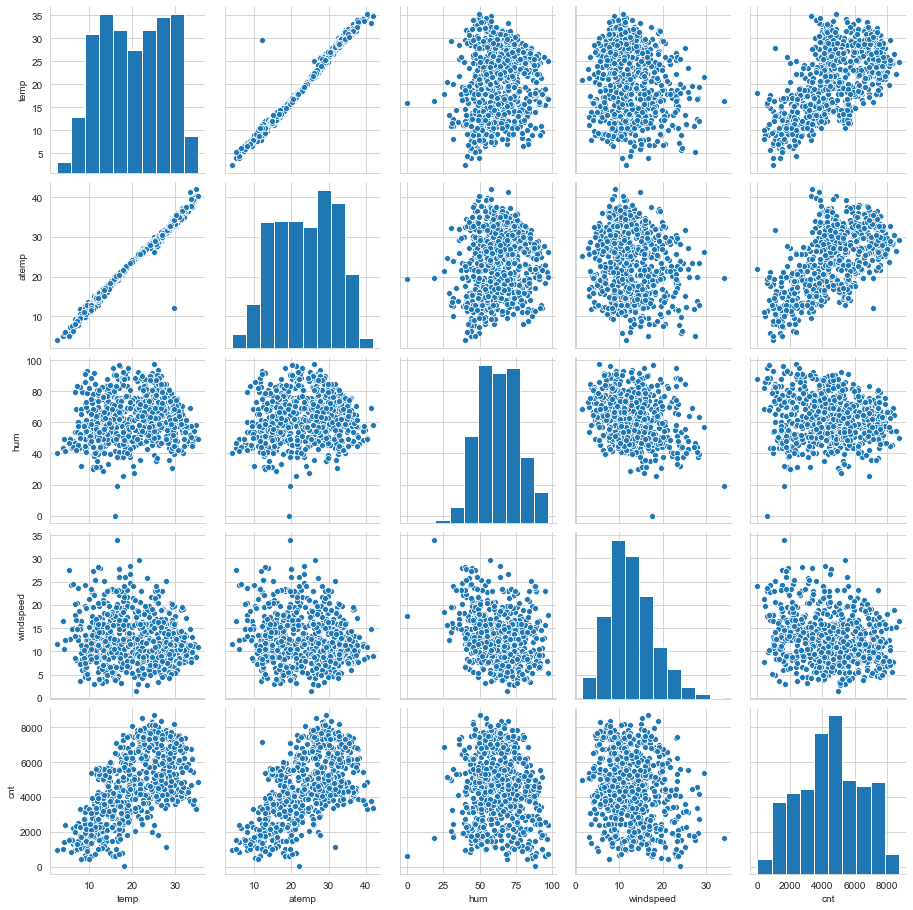

In [14]:
# Pair plot for Numeric Variables

sns.set_style("whitegrid")
sns.pairplot(bike_sharing_data[numerical_var])
plt.show()

#### `INFERENCE`
1. There is very high correlation between `temp` and `atemp`(Strong positive linear relationship), so we will `remove temp` column.
2. `atemp` seems to have highest correlation with target variable i.e. cnt 
3. There are more number of rentals in humidity range of 40 to 80.
4. There are more number of rentals in windspeed range of 15 to 20.

In [15]:
# drop temp column
bike_sharing_data.drop(["temp"], inplace= True, axis =1)

In [16]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,monday,1,weathersit_B,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,tuesday,1,weathersit_B,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,wednesday,1,weathersit_A,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,thursday,1,weathersit_A,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,friday,1,weathersit_A,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

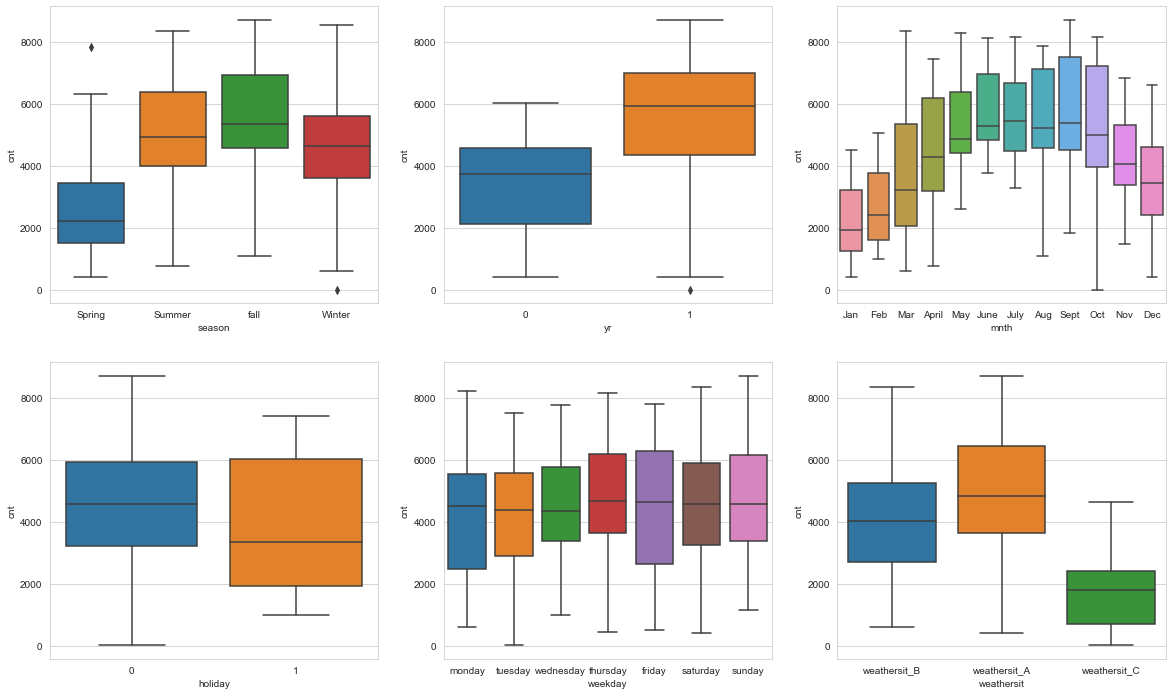

In [17]:
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")
for k,v in enumerate(categorical_var):
    plt.subplot(2,3,k+1)
    sns.boxplot(x = v, y = 'cnt', data = bike_sharing_data)
plt.show()

### `INFERENCE`
1. As observed from both season and mnth plot, 
   - Median of rentals in season Summer(mar-june) and fall(june- sept) is more 
   - Median of rentals in season spring is least
2. The rental spread is more when there is holiday(1)
3. No significant difference in Median rental on weekday but rental spread is more on friday.
4. There is significant increase in bike rental from year 2018 to 2019
5. Bike rentals are more in weathersit_A and least in weathersit_C

# <font color='green'>4. Preparing Data</font>

In [18]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,monday,1,weathersit_B,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,tuesday,1,weathersit_B,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,wednesday,1,weathersit_A,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,thursday,1,weathersit_A,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,friday,1,weathersit_A,11.46350,43.6957,12.522300,1600


### a. Encoding Variables: Dummy Variables
<b>Converting Categorical variables into dummy variables:</b><br>
The variables `season`, `month`, `weekday`, `weathersit` have multiple levels. We need to convert these levels into integer as well. 
For this, we will use something called `dummy variables`.

In [19]:
season_dummy = pd.get_dummies(bike_sharing_data['season'], drop_first= True)
month_dummy = pd.get_dummies(bike_sharing_data['mnth'], drop_first= True)
weekday_dummy = pd.get_dummies(bike_sharing_data['weekday'])
weathersit_dummy = pd.get_dummies(bike_sharing_data['weathersit'], drop_first= True)

In [20]:
# concatinate with bike_sharing_data
bike_sharing_data = pd.concat([bike_sharing_data,season_dummy], axis = 1)
bike_sharing_data = pd.concat([bike_sharing_data,month_dummy], axis = 1)
bike_sharing_data = pd.concat([bike_sharing_data,weekday_dummy], axis = 1)
bike_sharing_data = pd.concat([bike_sharing_data,weathersit_dummy], axis = 1)

In [21]:
bike_sharing_data.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace =True)

In [22]:
bike_sharing_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Sept,friday,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_B,weathersit_C
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Summer', 'Winter', 'fall', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sept', 'friday', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

Let's check the correlation coefficients to see which variables are highly correlated using heat map

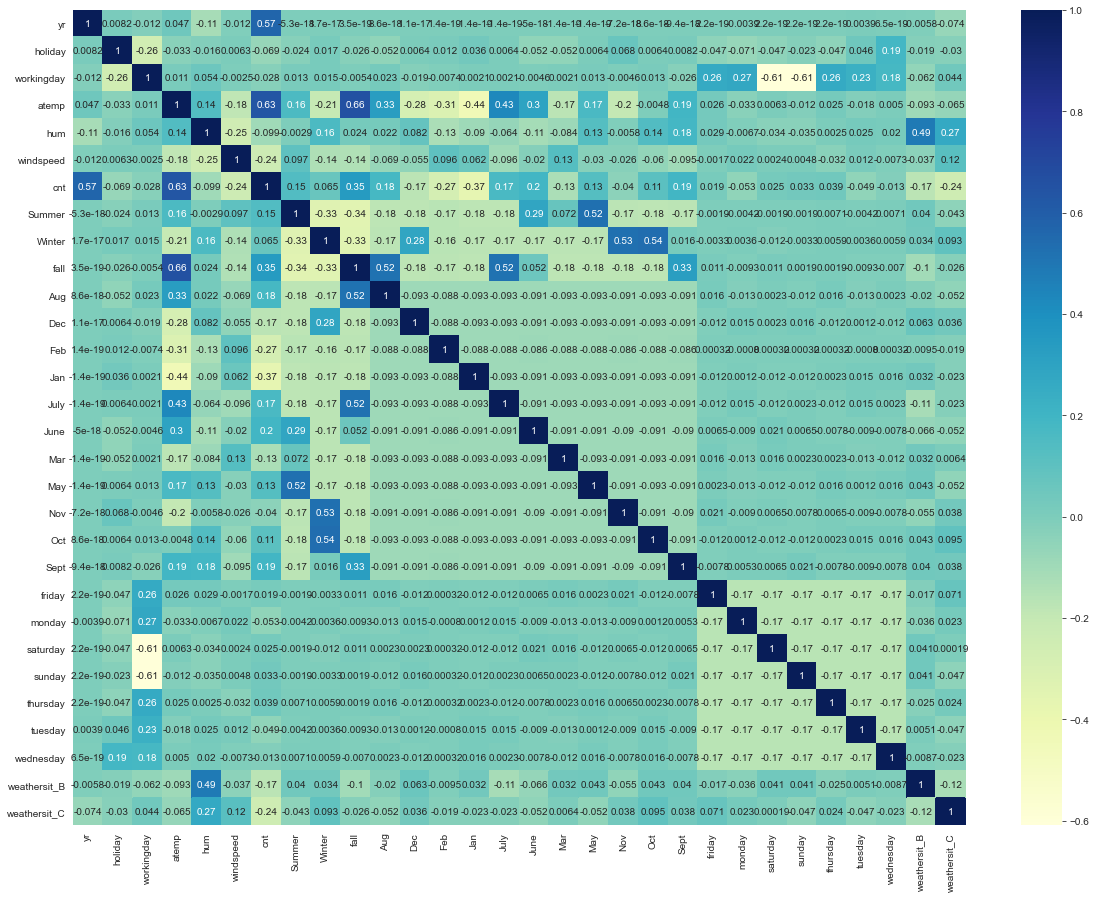

In [24]:
plt.figure(figsize = (20, 15))
sns.heatmap(bike_sharing_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### `INFERENCE`
1. We can observe that yr(year) and atemp(feeling temperature in Celsius) are highly correlated to cnt(count of total rental bikes)
2. Cnt an windspeed are inversly correlated. People may not like to rent a bike on a very windy day.
3. We can observe that Satueday and sunday have strong negative linear relationship with workingdays.

In [25]:
bike_sharing_data[(bike_sharing_data['workingday'] == 1) & (bike_sharing_data['sunday'] == 1)]

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Sept,friday,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_B,weathersit_C


In [26]:
bike_sharing_data[(bike_sharing_data['workingday'] == 1) & (bike_sharing_data['saturday'] == 1)]

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Sept,friday,monday,saturday,sunday,thursday,tuesday,wednesday,weathersit_B,weathersit_C


We can observe that Saturday and sunday have strong linear relationship with workingdays. Saturday and sunday variables are redundant since we can get this information from workingday variable. We have holidays on Saturdays and Sundays. Also there are no working saturdays and sundays. Therefore we will remove saturday and sunday variable.

In [27]:
bike_sharing_data.drop(["saturday","sunday"], axis = 1, inplace =True)

In [28]:
bike_sharing_data.shape

(730, 28)

In [29]:
bike_sharing_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Nov,Oct,Sept,friday,monday,thursday,tuesday,wednesday,weathersit_B,weathersit_C
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### b. Splitting the Data into Training and Testing Sets

In [30]:
# Import required library to perform split
from sklearn.model_selection import train_test_split

# split data into train set and test set in the ratio 7:3
bikeData_train, bikeData_test = train_test_split(bike_sharing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### c. Rescaling the Features 

In [31]:
# Import required library to MinMax scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rescale_vars = ['atemp', 'hum', 'windspeed', 'cnt']

In [32]:
bikeData_train[rescale_vars] = scaler.fit_transform(bikeData_train[rescale_vars])
bikeData_test[rescale_vars] = scaler.transform(bikeData_test[rescale_vars])

In [33]:
bikeData_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Nov,Oct,Sept,friday,monday,thursday,tuesday,wednesday,weathersit_B,weathersit_C
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,1,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# <font color='green'>5. Model Building</font>
We will Divide train dataset into X and Y sets for the model building.

In [34]:
y_train = bikeData_train.pop('cnt') # output/ dependent variable
X_train = bikeData_train # predictor/ independent variable

In [35]:
import statsmodels.api as sm

## Model 1: Using all variables


In [36]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Check the summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     99.99
Date:                Wed, 19 May 2021   Prob (F-statistic):          1.90e-178
Time:                        18:22:52   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     482   BIC:                            -864.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3104      0.042      7.442   

Looking at the p-values, it seems some of the variables aren't really significant (in the presence of other variables). Maybe we could drop some? We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

#### Checking VIF

In [38]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,229.50
21,monday,50.24
23,tuesday,49.06
20,friday,47.60
22,thursday,46.56
24,wednesday,42.78
4,hum,36.29
3,atemp,34.16
8,fall,14.01
7,Winter,10.67


### `INFERENCE`
As you can see from the summary and the VIF dataframe that the Adjusted R-squared value of model = 0.84 with 28 variables which is very high. But there are some variables with high p- value meaning these variables are highly insignificant and VIF >10. These variables need to be dropped to get better model. Since there are 28 variables, manual feature elemenation becomes complex.Therefore we will use RFE for feature selection.

### Model 2: Recursive feature elimination with 15 variable

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
# Columns selected by RFE
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Summer', 'Winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Nov', 'Sept', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [44]:
# Adding a constant variable 

lr2 = sm.OLS(y_train,(sm.add_constant(X_train_rfe))).fit()   # Running the linear model

In [45]:
# Check the summary
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 19 May 2021   Prob (F-statistic):          1.26e-186
Time:                        18:22:53   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2936      0.032      9.289   

#### Checking VIFs

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif2 = pd.DataFrame()
vif2['Features'] = X_train_rfe.columns
vif2['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,Winter,3.04
5,Summer,2.28
13,weathersit_B,2.24
0,yr,2.06
10,Jan,1.92
11,Nov,1.85
8,Dec,1.63


### `INFERENCE`
The Adjusted R-squared value of model = 0.837 with 15 variables. This model(with less variables) has similar Adjusted R-squared value as the previous(model 1) model with more variable. But there are still variables with very high VIFs values. 
 We can check whether similar Adjusted R-squared value can be achived with lesser number of predictor variable. 
We will perform Recursive feature elimination with `10 variable`

### Model 3: Recursive feature elimination with 10 variable

In [47]:
# Running RFE with the output number of the variable equal to 10
rfe2 = RFE(lm, 10)             # running RFE
rfe2 = rfe2.fit(X_train, y_train)

In [48]:
# Columns selected by RFE
selected_col2 = X_train.columns[rfe2.support_]
selected_col2

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Summer', 'Winter', 'Aug',
       'Sept', 'weathersit_C'],
      dtype='object')

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[selected_col2]

# Adding a constant variable 

lr3= sm.OLS(y_train,(sm.add_constant(X_train_rfe2))).fit()   # Running the linear model

In [50]:
# Check the summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 19 May 2021   Prob (F-statistic):          1.98e-183
Time:                        18:22:53   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2747      0.027     10.328   

We have achived Adjusted R-squared value= 0.828 with 10 predictor variables. We can now validate assumptions of linear regression on this model.

### Resudial Analysis of train set

In [52]:
# Predicting y_train from model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
y_train_pred = lr3.predict(X_train_rfe2)

# Calculating the residuals
res = (y_train - y_train_pred)

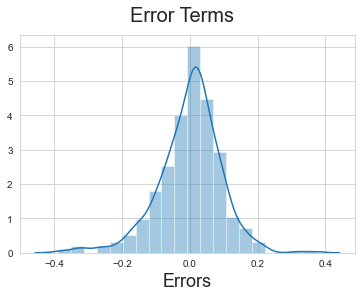

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

### `INFERENCE`
We can see that the graph is normal distribution with mean = 0

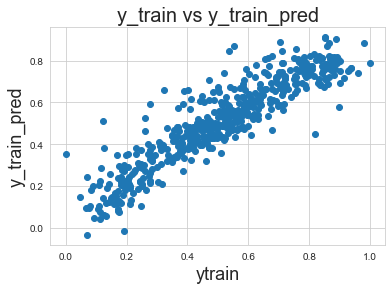

In [54]:
plt.scatter(y_train , y_train_pred)
plt.title('y_train vs y_train_pred', fontsize = 20)
plt.xlabel('ytrain', fontsize = 18)
plt.ylabel('y_train_pred', fontsize = 18)
plt.show()

### `INFERENCE`
We can see that the Error terms have constant variance.

# <font color='green'>6. Predictions on the Test Set</font>
We can now make the prediction using lr3 model

In [56]:
bikeData_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,fall,...,Nov,Oct,Sept,friday,monday,thursday,tuesday,wednesday,weathersit_B,weathersit_C
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,1,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,1,0,...,0,1,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,1,...,0,0,0,1,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_test = bikeData_test.pop('cnt') # output/ dependent variable
X_test = bikeData_test # predictor/ independent variable

In [58]:
# Adding a constant variable 
X_test_smt = sm.add_constant(X_test[selected_col2])

In [59]:
X_test_smt.head()

,const,yr,holiday,atemp,hum,windspeed,Summer,Winter,Aug,Sept,weathersit_C
184,1.0,0,1,0.769660,0.657364,0.084219,0,0,0,0,0
535,1.0,1,0,0.842587,0.610133,0.153728,1,0,0,0,0
299,1.0,0,0,0.496145,0.837699,0.334206,0,1,0,0,0
221,1.0,0,0,0.795343,0.437098,0.339570,0,0,1,0,0
152,1.0,0,0,0.741471,0.314298,0.537414,1,0,0,0,0


In [60]:
# Making predictions
y_test_pred = lr3.predict(X_test_smt)

# <font color='green'>7. Model Evaluation</font>

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_true = y_test, y_pred = y_test_pred )

0.8083425874276172

### `INFERENCE`
The Adjusted R-squared value of the test set = 0.808 which is very close to the Adjusted R-squared value of the Train set = 0.824 

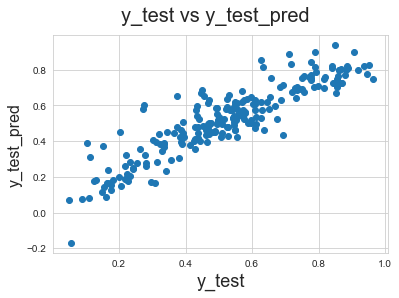

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [64]:
lr3.params.sort_values(ascending= False)

atemp           0.590609
const           0.274706
yr              0.227344
Winter          0.145855
Sept            0.123473
Summer          0.097619
Aug             0.063994
holiday        -0.086029
windspeed      -0.182564
weathersit_C   -0.183782
hum            -0.291650
dtype: float64

We can see that the equation of our best fitted line is:

$cnt = 0.275 + 0.591\times atemp + 0.227\times yr + 0.146\times Winter + 0.123\times Sept + 0.098\times Summer + 0.064\times Aug - 0.086\times holiday - 0.183\times windspeed -0.184\times weathersit_C -0.292\times hum $

### `INFERENCE`

<b>Based on the final model, the top 3 features contribute significantly towards explaining the demand of the shared bikes are:</b>

1. <b>atemp:</b> demand of the shared bikes increases by 0.59 units as the temperature increases by 1 unit. Therefore we can conclude that people prefer to rent bikes during summer and fall.

2. <b>yr:</b> demand of the shared bikes increases by 0.23 units as the year increases by 1 unit.

3. <b>hum:</b> demand of the shared bikes decreases by 0.29 units as the humidity increases by 1 unit(negative relationshio).Therefore we can conclude that people prefer to rent bikes on less humid days.